In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
train_path = "train"
test_path = 'test'

In [4]:
img_width=180
img_height=180

In [5]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.2
seed = 123

data_train= tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load validation dataset
data_val= tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 148 files belonging to 2 classes.
Using 119 files for training.
Found 148 files belonging to 2 classes.
Using 29 files for validation.


In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False  # Do not shuffle to keep the order
)


Found 40 files belonging to 2 classes.


In [7]:
data_cat=data_train.class_names
data_cat

['NORMAL', 'PNEUMONIA']

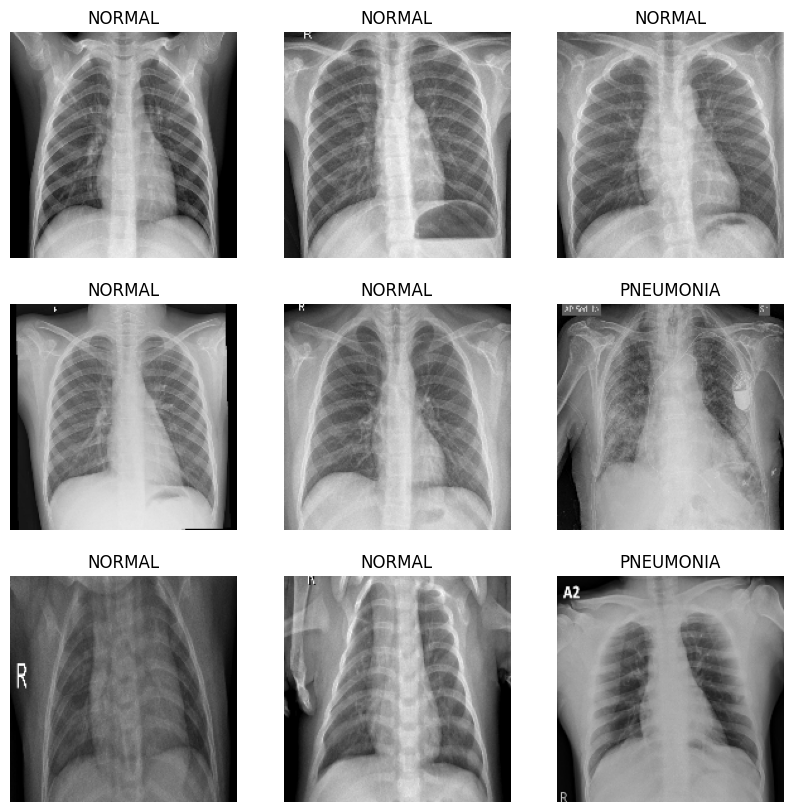

In [8]:
plt.figure(figsize=(10,10))
for image, lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[lables[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [10]:
model= Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])


In [11]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [12]:
epochs_size=25
history=model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 348ms/step - accuracy: 0.4869 - loss: 5.5886 - val_accuracy: 0.5862 - val_loss: 2.2759
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - accuracy: 0.4401 - loss: 2.3487 - val_accuracy: 0.4138 - val_loss: 0.7093
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - accuracy: 0.6064 - loss: 0.5672 - val_accuracy: 0.9310 - val_loss: 0.5062
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 0.8528 - loss: 0.4287 - val_accuracy: 0.9310 - val_loss: 0.3114
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step - accuracy: 0.9115 - loss: 0.2462 - val_accuracy: 0.9655 - val_loss: 0.1826
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.9086 - loss: 0.1970 - val_accuracy: 0.7586 - val_loss: 0.4379
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 259ms/step - accuracy: 0.9064 - loss: 0.1867 - val_accuracy: 0.9310 - val_loss: 0.2318
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.9322 - loss: 0.1260 - val_accuracy: 0.8621 - val_loss:

Text(0.5, 1.0, 'Loss')

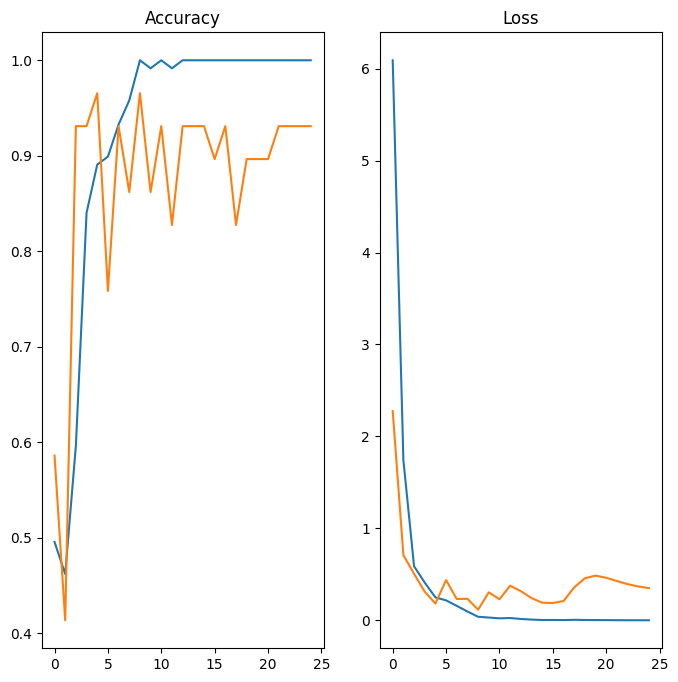

In [13]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation Loss')
plt.title('Loss')

In [14]:
y_pred=model.predict(data_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [15]:
y_pred_class_indices = tf.argmax(y_pred, axis=1)


In [16]:
score=tf.nn.softmax(y_pred)

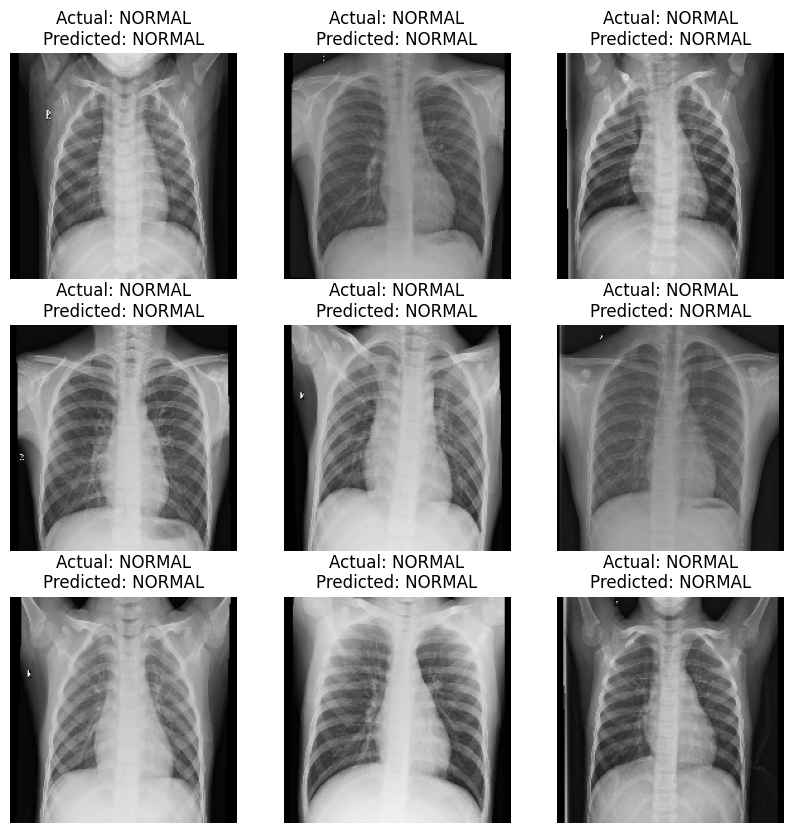

In [17]:
for images, labels in data_test.take(1):  # Take one batch from the test dataset
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):  # Plot up to 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        actual_label = data_cat[labels[i].numpy()]
        predicted_label = data_cat[y_pred_class_indices[i].numpy()]
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
        plt.axis('off')
    plt.show()

In [18]:
print("Class names:", data_cat)

Class names: ['NORMAL', 'PNEUMONIA']


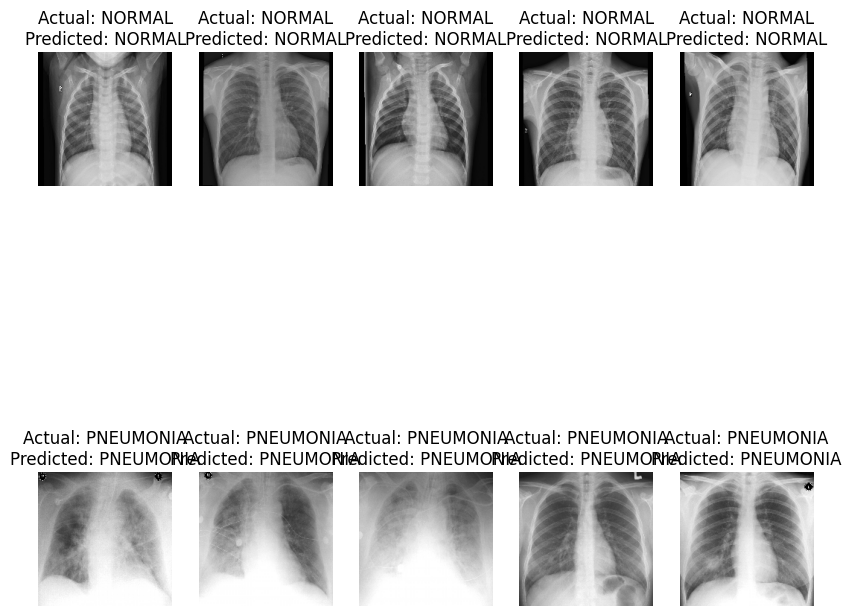

In [19]:
# Filter images by class
class1_indices = []
class2_indices = []
class1 = data_cat[0]  # Replace with your class name
class2 = data_cat[1]  # Replace with your class name

for batch_images, batch_labels in data_test:
    for i in range(len(batch_images)):
        actual_class = data_cat[batch_labels[i].numpy()]
        if actual_class == class1 and len(class1_indices) < 5:
            class1_indices.append((batch_images[i], batch_labels[i], y_pred_class_indices[i]))
        elif actual_class == class2 and len(class2_indices) < 5:
            class2_indices.append((batch_images[i], batch_labels[i], y_pred_class_indices[i]))
        if len(class1_indices) >= 5 and len(class2_indices) >= 5:
            break
    if len(class1_indices) >= 5 and len(class2_indices) >= 5:
        break
plt.figure(figsize=(10, 10))
for i, (image, actual, predicted) in enumerate(class1_indices + class2_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.numpy().astype('uint8'))
    actual_label = data_cat[actual.numpy()]
    predicted_label = data_cat[predicted.numpy()]
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')
plt.show()

In [20]:
print(score)

tf.Tensor(
[[9.99999404e-01 5.98751456e-07]
 [9.99999404e-01 6.47417039e-07]
 [9.99978185e-01 2.18549376e-05]
 [1.00000000e+00 1.14271987e-08]
 [9.99999762e-01 2.22809618e-07]
 [9.78588104e-01 2.14118939e-02]
 [9.99999046e-01 9.22549532e-07]
 [1.00000000e+00 1.12568926e-10]
 [9.99887228e-01 1.12804802e-04]
 [9.99978900e-01 2.10740636e-05]
 [1.00000000e+00 1.77122299e-08]
 [1.00000000e+00 3.05900838e-09]
 [9.99603450e-01 3.96626652e-04]
 [9.99893427e-01 1.06536179e-04]
 [9.99999046e-01 9.22476488e-07]
 [9.99999642e-01 3.61335424e-07]
 [9.99999285e-01 6.85324494e-07]
 [9.99980569e-01 1.94627901e-05]
 [9.99999523e-01 4.77425488e-07]
 [9.99995589e-01 4.36816254e-06]
 [2.58448069e-10 1.00000000e+00]
 [1.06661359e-03 9.98933375e-01]
 [1.02001661e-06 9.99998927e-01]
 [4.57961760e-05 9.99954224e-01]
 [6.07417064e-07 9.99999404e-01]
 [6.89291346e-06 9.99993086e-01]
 [7.16562181e-06 9.99992847e-01]
 [3.49353541e-05 9.99965072e-01]
 [1.93023038e-06 9.99998093e-01]
 [9.52099890e-06 9.99990463e-01]